<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-первичный-осмотр" data-toc-modified-id="Загрузка-данных-и-первичный-осмотр-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных и первичный осмотр</a></span></li><li><span><a href="#Лемматизация-и-токенизация-текста" data-toc-modified-id="Лемматизация-и-токенизация-текста-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Лемматизация и токенизация текста</a></span></li><li><span><a href="#Дисбаланс-классов" data-toc-modified-id="Дисбаланс-классов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Дисбаланс классов</a></span></li><li><span><a href="#Разделение-на-признаки-и-целевой-признак" data-toc-modified-id="Разделение-на-признаки-и-целевой-признак-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Разделение на признаки и целевой признак</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Создание-корпуса-текстов-и-учет-стоп-слов" data-toc-modified-id="Создание-корпуса-текстов-и-учет-стоп-слов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Создание корпуса текстов и учет стоп-слов</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

В вашем распоряжении набор данных с разметкой о токсичности правок.


**Цель проект:**
- Обучить модель классифицировать комментарии на позитивные и негативные. Метрика качества *F1* должна быть не меньше 0.75.

**Задачи проекта:**
- Загрузить и подготовить данные.
- Обучить разные модели. 
- Выбрать наилучшую модель и сформулировать вывод.

В нашем распоряжении набор данных с разметкой о токсичности правок.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import nltk


from nltk.corpus import stopwords as nltk_stopwords

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")
from tqdm.notebook import tqdm
import spacy
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Кирилл\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Кирилл\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Кирилл\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Кирилл\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Подготовка

### Загрузка данных и первичный осмотр

In [2]:
try:
    df = pd.read_csv('/datasets/toxic_comments.csv')
except:
    df = pd.read_csv('toxic_comments.csv')

In [3]:
df.head(10)

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
5,5,"""\n\nCongratulations from me as well, use the ...",0
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,7,Your vandalism to the Matt Shirvington article...,0
8,8,Sorry if the word 'nonsense' was offensive to ...,0
9,9,alignment on this subject and which are contra...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [5]:
df['Unnamed: 0'].nunique()

159292

In [6]:
# удаляем ненужный столбец Unnamed
df = df.drop(['Unnamed: 0'], axis=1)

**Вывод:** В датасете представлено около 160 тыс. строк с различными описаниями товаров. Пропуски отсутствуют. В связи с ненадобностью, удален столбец, который повторяет столбец с индексами.

### Лемматизация и токенизация текста

In [7]:
# Spacy lemmatizer
nlp = spacy.load("en_core_web_sm")
sentence = "The striped bats are hanging on their feet for best"
doc = nlp(sentence)
" ".join([token.lemma_ for token in doc])

'the stripe bat be hang on their foot for good'

In [8]:
def lemm_spacy(text):
    clear_text = nlp(" ".join(re.sub(r'[^a-zA-z]', ' ', text).split()))
    lemmatized_text = " ".join([token.lemma_ for token in clear_text])
    return lemmatized_text

In [9]:
tqdm.pandas()
df['lemmatized_text'] = df['text'].progress_apply(lemm_spacy)

  0%|          | 0/159292 [00:00<?, ?it/s]

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Правильная лемматизация длится долго... Минут 20-30, в зависимости от мощности компьютера. Гораздо комфортнее видеть прогресс выполнения этой длительной операции, чем сидеть и гадать "а не зависла ли она", "закончит только к утру или через 30 секунд"? Можно воспользоваться прогресс -баром от tqdm.
    
     
    from tqdm.notebook import tqdm
    tqdm.pandas()

    data['lemm_text'] = data['text'].progress_apply(lemmafunction)
    
    
    
    
</div>



<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Добавил визуальный прогресс. Спасибо за новую фичу, не знал про функцию progress_apply

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 🤝 </div>

In [10]:
df.head(10)

,text,toxic,lemmatized_text
0,Explanation\nWhy the edits made under my usern...,0,Explanation why the edit make under my usernam...
1,D'aww! He matches this background colour I'm s...,0,d aww he match this background colour I m seem...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man I m really not try to edit war it s ju...
3,"""\nMore\nI can't make any real suggestions on ...",0,More I can t make any real suggestion on impro...
4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you remember wha...
5,"""\n\nCongratulations from me as well, use the ...",0,congratulation from I as well use the tool wel...
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,COCKSUCKER before you pis around on MY work
7,Your vandalism to the Matt Shirvington article...,0,your vandalism to the Matt Shirvington article...
8,Sorry if the word 'nonsense' was offensive to ...,0,sorry if the word nonsense be offensive to you...
9,alignment on this subject and which are contra...,0,alignment on this subject and which be contrar...


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Молодец, что используешь лемматизатор WordNetLemmatizer. Но в данном случае он отработал не очень хорошо, и если присмотреться к тексту это хорошо видно. Например, в четвертой строке видим глагол are, но его начальная форма - be. Аналогично в нулевой строке есть глагол made, а его начальная форма make. 
    
Как правило, совершаются следующие ошибки:
    
 - Лемматизация должна производиться по одному слову, а не весь комментарий целиком
 - Слова должны быть приведены к нижнему регистру
 - Кроме самого слова в лемматизатор нужно передать дополнительную информацию о части речи слова (POS тег). 
    
    
    
Ты можешь доработать подход с WordNetLemmatizer или использовать spaCy, там все отрабатывает "из коробки". Можешь посмотреть вот эту статью.  


https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/
    
Хочу обратить твое внимание, что код из вышеуказанной статьи выполняется несколько дольше, чем оптимизированный, вот из этого топика
    
https://stackoverflow.com/questions/50992974/nltk-wordnetlemmatizer-not-lemmatizing-as-expected    
    
    
    
Совет - старайся сразу проверять  результаты лемматизации. Например, для предложения
    
    sentence = "The striped bats are hanging on their feet for best"
    
После лемматизации должен получиться вот такой результат
    
    "the strip bat be hang on their foot for best"    
    
Если будешь лемматизировать по второму способу, то слово  striped может остаться без изменений, это тоже  нормально (особенность алгоритма).       
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Исправлено, использовал spacy для лемматизации

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

### Дисбаланс классов

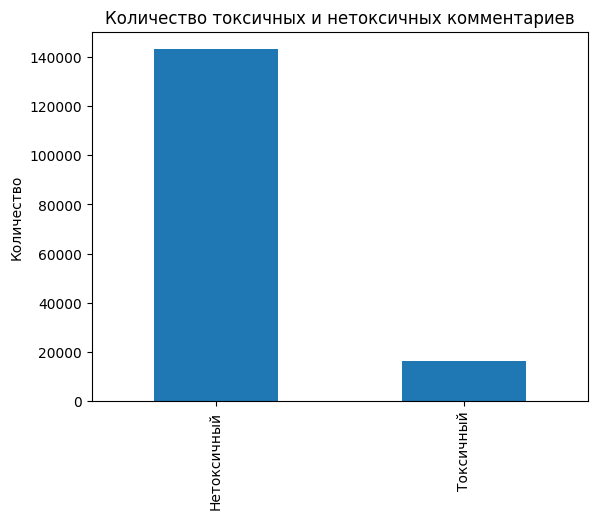

In [11]:
df['toxic'].value_counts().plot(kind='bar')
plt.ylabel('Количество')
plt.title('Количество токсичных и нетоксичных комментариев')
plt.xticks([0, 1], ['Нетоксичный', 'Токсичный'])
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, исследован баланс классов. Это важная информация для задачи классификации.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    Для категориальных признаком лучше исполользовать столбчатую диаграмму, а гистограмму давай оставим для числовых признаков.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Напоминаю, что по правилам оформления проектов у графиков должны быть заголовки и подписаны оси (где это уместно).</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Исправлено

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [12]:
class_balance = df['toxic'].value_counts()
print(class_balance[0])
print(class_balance[1])

143106
16186


In [13]:
class_balance[0] / class_balance[1]

8.841344371679229

Обнаружен явный дисбаланс, где класс с токсичными комментариями меньше почти в 9 раз

### Разделение на признаки и целевой признак

In [14]:
features = df['lemmatized_text']
target = df['toxic']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.1, random_state = 12345, stratify=target)


print(features_train.shape)
print(target_train.shape)

print(features_test.shape)
print(target_test.shape)

(143362,)
(143362,)
(15930,)
(15930,)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    
Абсолютно согласен с твоим решением выделить 10% на тестовую выборку. Учитывая общий размер данных данной выборки достаточно.
    
Отдельный "лайк" за стратификацию.    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Не стоит делать балансировку - это "скользкая дорожка". Это было бы нормально, если бы ты использовал сбалансированную выборку только для обучения модели. Но ведь ты используешь её для кросс-валидации, соответственно и оценку модели ты производишь на сбалансированном валидационном фолде. А оценка метрики f1, полученная на сбалансированной выборке покажет заметно более высокие значения, чем оценка этой же метрики этой же модели, но полученная на исходной, несбаласнированной выборки.
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Удалил ячейки с кодом, где использовалась балансировка с помощью downsampling-a

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

**Вывод:** Загружены все описания товаров в сервисе ВикиШоп, произведены операции лемматизации и токенизации текста. Данные разделены на обучающую и тестовую выборки.

## Обучение

### Создание корпуса текстов и учет стоп-слов

In [15]:
stopwords = set(nltk_stopwords.words('english'))

count_tf_idf = TfidfVectorizer(stop_words=stopwords)
tf_idf_train = count_tf_idf.fit_transform(features_train)

tf_idf_test = count_tf_idf.transform(features_test)

### Linear Regression

In [16]:
pipeline_lr = Pipeline(
    [
        ("vect", TfidfVectorizer(stop_words=stopwords)),
        ("clf", LogisticRegression()),
    ]
)

In [17]:
scores_lr = cross_val_score(pipeline_lr, features_train, target_train, cv=5, scoring='f1')
f1_lr = scores_lr.mean()
f1_lr

0.7365059329538844

### Random Forest

In [18]:
pipeline_rf = Pipeline(
    [
        ("vect", TfidfVectorizer(stop_words=stopwords)),
        ("clf", RandomForestClassifier(random_state=12345)),
    ]
)

In [19]:
params_grid = {
    'clf__n_estimators' : [10, 30, 60],
    'clf__max_depth' : [2, 5, 10, 15]
}

In [20]:
GS_rf = GridSearchCV(estimator = pipeline_rf,
                     param_grid = params_grid,
                     scoring = 'f1',
                     cv=5) 

In [21]:
%%time
GS_rf.fit(features_train, target_train)

CPU times: total: 3min 48s
Wall time: 3min 48s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'are',
                                                                    'aren',
          

In [22]:
GS_rf.best_params_

{'clf__max_depth': 15, 'clf__n_estimators': 10}

In [23]:
f1_rf = GS_rf.best_score_
f1_rf

0.004106778589007964

### LightGBM

In [24]:
pipeline_lgb = Pipeline(
    [
        ("vect", TfidfVectorizer(stop_words=stopwords)),
        ("clf", LGBMClassifier(random_state=12345)),
    ]
)

In [25]:
params_grid_lgb = {
    'clf__num_leaves': [31, 50, 80],
    'clf__learning_rate': [0.05, 0.1],
    'clf__n_estimators': [100, 150]
}

In [26]:
GS_lgb = GridSearchCV(estimator = pipeline_lgb,
                     param_grid = params_grid_lgb,
                     scoring = 'f1',
                     cv=5)

In [27]:
%%time
GS_lgb.fit(features_train, target_train)

[LightGBM] [Info] Number of positive: 11653, number of negative: 103036
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.678040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 500348
[LightGBM] [Info] Number of data points in the train set: 114689, number of used features: 9306
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.101605 -> initscore=-2.179515
[LightGBM] [Info] Start training from score -2.179515
[LightGBM] [Info] Number of positive: 11653, number of negative: 103036
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.731307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 500895
[LightGBM] [Info] Number of data points in the train set: 114689, number of used features: 9376
[Light

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'are',
                                                                    'aren',
          

In [28]:
GS_lgb.best_params_

{'clf__learning_rate': 0.1, 'clf__n_estimators': 150, 'clf__num_leaves': 80}

In [29]:
f1_lgb = GS_lgb.best_score_
f1_lgb

0.7789805574260013

### Выбор лучшей модели

In [30]:
models_info = [['LinearRegression', f1_lr],
            ['RandomForestRegression', f1_rf],
            ['LightGBM', f1_lgb]]

In [31]:
pd.DataFrame(models_info, columns=["Model","F1_score"])

,Model,F1_score
0,LinearRegression,0.736506
1,RandomForestRegression,0.004107
2,LightGBM,0.778981


Наилучшее значение f1_score для тестовой выборки оказалось у модели LightGBM

## Проверка лучшей модели на тестовой выборке

In [32]:
GS_lgb.best_estimator_

Pipeline(steps=[('vect',
                 TfidfVectorizer(stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...})),
                ('clf',
                 LGBMClassifier(n_estimators=150, num_leaves=80,
                                random_state=12345))])

In [33]:
predictions_test = GS_lgb.predict(features_test)

In [34]:
f1_test = f1_score(target_test, predictions_test)
f1_test

0.790633608815427

**Вывод:** При проверке модели на тестовой выборке метрика f1 оказалась 0.79

## Выводы

В ходе работы на проектом выполнены следующие мероприятия:
- Загружены и проанализированы описания товаров в интернет-магазине Wikishop.
- Подготовлены данные для обучения моделей: произведены лемматизация и токенизация описаний, данные разделены на обучающую и тестовую выборки с использованием стратификации.
- Обучены 3 разные модели (LinearRegression, RandomForest, LightGBM), подобраны оптимальные гиперпараметры. 
- Выбрана наилучшая модель по метрике f1. Ей оказалась модель LightGBM. При проверке качества модели на тестовой выборке метрика f1-score составил 0.79, что входит в пределы порогового значения >0.75.